<H1><CENTER> Machine Learning Lab - Exercise Sheet 3 <br /></CENTER></H1>
<H2><CENTER> Author: Sebastian Pineda Arango  <br />
ID: 246098<br />
Universität Hildesheim - Data Analytics Master </CENTER></H2>

<img src="https://www.uni-hildesheim.de/typo3conf/ext/unihildesheim/Resources/Public/Images/logo-uni.svgz" width="100">

## 1.1. Data Preprocessing
### 1.1.1. Datasets

We donwload the following datasets:

- Airfare and demand (http://www.stat.ulf.edu/winter/data/airq402.dat)
- Wine Quality 
(http://archive.ics.uci.edu/ml/datasets/Wine+Quality)

Firstly, we read the dataset 1 (Airfare and demand), using pandas. We also assing the column names since it is not present on the original dataset.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#columns names for dataset1
header1 = ["CITY1",
          "CITY2",
          "AVG_FARE",#average fare
          "DIST", #Distance
          "AVG_WK_PASS", #average weekly passengers
          "MKT_LEAD_AIR", #market leading airline
          "MKT_SHARE", #market share
          "AVG_FARE2", #average_fare
          "LOW_PRICE_AIR", #low price airline
          "MKT_SHARE", #market share
          "PRICE" #price
          ]
#reading dataset1
dataset1 = pd.read_csv("airq402.txt", sep="\s+", header=None)

#setting header as columns names
dataset1.columns=header1

#exploring first columns
dataset1.head()

,CITY1,CITY2,AVG_FARE,DIST,AVG_WK_PASS,MKT_LEAD_AIR,MKT_SHARE,AVG_FARE2,LOW_PRICE_AIR,MKT_SHARE,PRICE
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [8]:
#reading dataset2
dataset2 = pd.read_csv("winequality-red.csv", sep=";")
dataset2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
#reading dataset3
dataset3 = pd.read_csv("winequality-white.csv",sep=";")
dataset3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### Handling categorical data

Since the dataset1 has four categorical features, we use get_dummies from pandas to convert it to one-hot-encoding. We know, however, that this encoding creates many new variables (one for each category), which can be problematic to build the model. We want to know how many different categories each categorical variable has.

In [10]:
count_LOW_PRICE_AIR = len(np.unique(dataset1.LOW_PRICE_AIR))
count_MKT_LEAD_AIR = len(np.unique(dataset1.MKT_LEAD_AIR))
count_CITY1 = len(np.unique(dataset1.CITY1))
count_CITY2 = len(np.unique(dataset1.CITY2))
print("Count for LOW_PRICE_AIR: ", count_LOW_PRICE_AIR)
print("Count for MKT_LEAD_AIR: ", count_MKT_LEAD_AIR)
print("Count for CITY1: ", count_CITY1)
print("Count for CITY2: ", count_CITY2)

Count for LOW_PRICE_AIR:  19
Count for MKT_LEAD_AIR:  16
Count for CITY1:  90
Count for CITY2:  85


We see that some variables have many categories. Therefore, before applying the encoding for the variables with many categories (CITY1 and CITY2), we filter only the most common categories (whose ocurrency is above 70% of the cases - pareto) and the rest of the categories get encoded as "OTHER" (a generic category).

In [11]:
#encoding categorical variable LOW_PRICE_AIR
LPRICE_dummies = pd.get_dummies(dataset1.LOW_PRICE_AIR)

#encoding categorical variable MKT_LEAD_AIR
MKT_dummies = pd.get_dummies(dataset1.MKT_LEAD_AIR)

In [12]:
#using pareto to econde only the most common categories for CITY1
counts=dataset1.CITY1.value_counts() #get the counts for each category
cumsum = np.cumsum(counts/sum(counts)) #cummulative sum of the categories
names_CITY1 = list(cumsum.index)

#selecting only those most common categories whose ocurrency represents the 70% of the total samples 
new_name_CITY1 = [names_CITY1[i] if cumsum[i]<0.7 else 'OTHER' for i in range(len(names_CITY1))] 

#creating a dictionary with the new name
dict_CITY1 = dict(zip(names_CITY1, new_name_CITY1))

#changing the name of those variables whose ocurrency is not included in the 70% of the total samples
#this variables get the name: "OTHER", as a generic class
new_CITY1 = [dict_CITY1[c] for c in dataset1.CITY1]
dataset1.CITY1 = new_CITY1
cumsum.head(23)

ATL    0.064
ORD    0.127
DFW    0.179
BWI    0.226
IAH    0.264
BOS    0.302
LAS    0.339
DEN    0.375
DTW    0.408
LAX    0.439
FLL    0.468
LGA    0.496
MCI    0.519
CLE    0.541
AUS    0.562
MSP    0.582
CLT    0.600
ABQ    0.618
PHX    0.636
CMH    0.654
MCO    0.671
MSY    0.686
BDL    0.700
Name: CITY1, dtype: float64

As the last print shows, only 23 categories out of 90, includes the 70% of the samples. This shows that creating the new generic category for the generic class makes sense.

In [13]:
#using pareto to get the most common categories for CITY2 (the same procedure as before)
counts=dataset1.CITY2.value_counts()
cumsum = np.cumsum(counts/sum(counts))
names_CITY2 = list(cumsum.index)
new_name_CITY2 = [names_CITY2[i] if cumsum[i]<0.7 else 'OTHER' for i in range(len(names_CITY2))]
dict_CITY2 = dict(zip(names_CITY2, new_name_CITY2))
new_CITY2 = [dict_CITY2[c] for c in dataset1.CITY2]
dataset1.CITY2 = new_CITY2

After creating a new cateory that includes the 30% less common categories for CITY1 and CITY2, we encode all categorical features using get_dummies. At the end, we get 92 different features. They are still too many features, but they could be potentially more.

In [14]:
#encoding categorical features
dataset1 = pd.get_dummies(dataset1, columns=['CITY1', 'CITY2', 'MKT_LEAD_AIR', 'LOW_PRICE_AIR'])
dataset1.shape

(1000, 92)

#### Dataset cleaning

There are many sofisticated techniques for replace missing data on datasets (i.e. mean imputation). However, this time we decide to simply dropping NA values.

In [15]:
#dropping NA of dataset1
dataset1 = dataset1.dropna()

#dropping NA of dataset2
dataset2 = dataset2.dropna()

#dropping NA of dataset1
dataset3 = dataset3.dropna()


## 1.2. Linear regression with gradient descent

We want to perform a linear regression with gradient descent. But before that, we should separate the datasets into train and test data. Therefore, we define a split_train_test function which executes this process.

In [16]:
def normalize (x):
    #normalizing
    out = (x-min(x))/(max(x)-min(x))
    return out

def split_train_test(data, train_pct, features, target):
    
    '''This functions divides "data"  in train and test set.
    The percentage give to the train data is determined by "train_pct".
    The "features" argument determine a list of features to consider.
    The "target" arugment indicates the the variable to predict.'''
    
    #getting the total number of training samples
    data_size = data.shape[0]
    train_size = int(train_pct*data_size)

    #shuffling indexes to separate train and test randoming
    idx = np.arange(0,data_size)
    np.random.shuffle(idx)

    #creating test indexes
    train_idx = idx[:train_size]

    #creating test indexes
    test_idx = idx[train_size:]

    #selecting train data (features)
    X_train = data[features].iloc[train_idx,]

    #selecting train data (target)
    y_train = data[target].iloc[train_idx,]

    #selecting test data (features)
    X_test = data[features].iloc[test_idx,]

    #selecting test data (target)
    y_test = data[target].iloc[test_idx,]
    
    #stacking a column of ones to the training and test set
    X_train = np.hstack((X_train, np.ones((X_train.shape[0],1))))
    X_test = np.hstack((X_test, np.ones((X_test.shape[0],1))))
    
    return X_train, y_train, X_test, y_test


After defining this function, we applything to divide the three datasets into train and test data. We also select the target fot the three datasets:

- Target for dataset1: price
- Target for dataset2: quality
- Target for dataset3: quality

In [17]:
#creating train and test data for dataset1
features1 = list(dataset1.columns) #list of features
target1 = 'PRICE'
features1.remove('PRICE')
X_train1, y_train1, X_test1, y_test1 = split_train_test(dataset1, 0.8, features1, target1)

#creating train and test data for dataset2
features2 = list(dataset2.columns) #list of features
target2 = 'quality'
features2.remove('quality')
X_train2, y_train2, X_test2, y_test2 = split_train_test(dataset2, 0.8, features2, target2)

#creating train and test data for dataset3
features3 = list(dataset3.columns) #list of features
target3 = 'quality'
features3.remove('quality')
X_train3, y_train3, X_test3, y_test3 = split_train_test(dataset3, 0.8, features3, target3)

Now we want to implement the functions to calculate the gradient and to calclate the loss. This functions have the following form.

The prediction function for linear regression is given by:$
\hat{y}^n = \sum_{m=1}^M \beta_mx_m^n = X\beta $ 

The least square loss function is given by: 
$
l = \sum_{n=1}^N (y^n-\hat{y}^n)^2  $

The gradient of the least sqaure loss function is given by:
$ \triangledown l = -2X^T(y-X\beta) $

In [18]:
def grad_linear_function(X, beta, y):
    
    '''Computes the gradient of the loss function of linear regression (MSE).
    The parameters are:
    - X is the matrix of features
    - beta is the vector of parameters for the linear regression
    - y is the target vector'''
    
    grad = -2*X.T*(y-X*beta)
    
    return grad

def linear_loss (X, beta, y):
    
    '''Computes the loss of linear regression (MSE).
   The parameters are:
    - X is the matrix of features
    - beta is the vector of parameters for the linear regression
    - y is the target vector     '''
    
    y_pred = X*beta
    out = np.sum(np.array(y_pred-y)**2)
    
    return out



In [32]:
def learn_linregGD(X_train, y_train, X_test, y_test, u, max_iter):
    
    """This functions finds the best parameters for a linear regression
    using X_train and y_train to estimate these parameters.
    It also evaluates RMSE and difference of losses fo X_train and X_test.
    The argument 'max_iter' determines the maximum number of iterations.
    The arugment 'u' determines a tuple of step legth values to try.
    
    Returns: 
    - beta: the optimized parameter
    - dif_train_list: a list with the difference of losses for train data
    - dif_test_list: a list with the difference of losses for test data
    - rmse_train_list: a list with the RMSE for train data
    - rmse_test_list: a list with the RMSE for test data """
    
    #Transforming to data type matrix
    X_train = np.matrix(X_train)
    X_test = np.matrix(X_test)
    y_train = np.matrix(y_train).T
    y_test = np.matrix(y_test).T
    
    #getting the number of samples for each data set
    n_samples_train = X_train.shape[0]
    n_samples_test = X_test.shape[0]
    
    #initializing the parameter beta to optimize
    beta = np.matrix(np.zeros((X_train.shape[1],1)))

    #initializing parameters to calculate differences of losses
    prev_loss_train = 0
    prev_loss_test = 0
    
    dif_train_list = []
    rmse_train_list = []
    dif_test_list = []
    rmse_test_list = []
    
    for i in range(max_iter):
        
        #upgrading beta
        beta = beta - u*grad_linear_function(X_train, beta, y_train)
        
        #loss train
        loss_train = linear_loss(X_train, beta, y_train)
        
        #loss test
        loss_test = linear_loss(X_test, beta, y_test)
        
        #dif train
        dif_train = np.abs(loss_train-prev_loss_train)
        
        #dif test
        dif_test = np.abs(loss_test-prev_loss_test)
        
        #prev loss train
        prev_loss_train = loss_train
        
        #prev loss test
        prev_loss_test = loss_test
        
        #rmse train
        rmse_train = np.sqrt(loss_train/n_samples_train)
        
        #rmse test
        rmse_test = np.sqrt(loss_test/n_samples_test)
    
        if(i==40):
            print("Dif. train:",dif_train, "with u=", u)
            print("Dif. test:", dif_test, "with u=", u)
            print("RMSE train:", rmse_train,"with u=", u)
            print("RMSE test:", rmse_test, "with u=", u)
            
        dif_train_list.append(dif_train)
        rmse_train_list.append(rmse_train)
        dif_test_list.append(dif_test)
        rmse_test_list.append(rmse_test)
        
    return beta, dif_train_list, dif_test_list, rmse_train_list, rmse_test_list

%matplotlib inline
def plot_training (X_train, y_train, X_test, y_test, u, max_iter, learn_function):

    '''This functions perform the plot of the lists returned by the training functions.
    The training function is specified in the parameter 'learn_function'.
    The training function used returns:
        - The optimal parameter beta
        - Differences of the loss for the train data (plotted)
        - Differences of the loss for the test data (plotted)
        - RMSE for the train data (plotted)
        - RMSE for the test data (plotted)
        
    This functions does not return anything. '''
    
    for u_i in list(u): 
        fig, (ax,ax2) = plt.subplots(1,2,figsize=(8, 5))
        
        #calling the training function
        beta, dif_train_list, dif_test_list, rmse_train_list, rmse_test_list = learn_function(X_train, y_train, X_test, y_test,
                                                                 u_i, max_iter)
        #creating and plotting on the first axis
        ax.plot(dif_train_list[1:], 'r')
        ax.plot(dif_test_list[1:], 'b')
        ax.set_title("Differences with steplength="+str(u_i))
        ax.legend(("Train", "Test"))
        ax.grid()
        
        #creating and plotting on the second axis
        ax2.plot(rmse_train_list[1:], 'r')
        ax2.plot(rmse_test_list[1:], 'b')
        ax2.legend(("Train", "Test"))
        ax2.set_title("RMSE with steplength="+str(u_i))
        ax2.grid()

    return 0



We use the above defined function to plot the differences of losses and the RMSE at each iteration for train and test.

For the dataset1, we compare the measures at iteration 40 to compare:




<table style="width:100%">
  <tr>
    <th>Step-length</th>
    <th>Differences at iteration 40 (train)</th> 
    <th>RMSE at iteration 40 (train)</th>
  </tr>
  <tr>
    <td>$\mu = 2e-10$</td>
    <td>12606</td> 
    <td>51</td>
  </tr>
  <tr>
    <td>$\mu = 1e-10$</td>
    <td>7304</td> 
    <td>54</td>
  </tr>
   <tr>
    <td>$\mu = 1e-12$</td>
    <td>78180</td> 
    <td>135</td>
  </tr>
</table> 


Dif. train: 12606.0115308 with u= 2e-10
Dif. test: 3272.84919624 with u= 2e-10
RMSE train: 51.6998956456 with u= 2e-10
RMSE test: 52.2973274088 with u= 2e-10
Dif. train: 7384.03760753 with u= 1e-10
Dif. test: 1829.10748778 with u= 1e-10
RMSE train: 54.9700543258 with u= 1e-10
RMSE test: 55.6169883102 with u= 1e-10
Dif. train: 78180.3570965 with u= 1e-12
Dif. test: 17721.1885697 with u= 1e-12
RMSE train: 135.178956645 with u= 1e-12
RMSE test: 134.250905255 with u= 1e-12


0

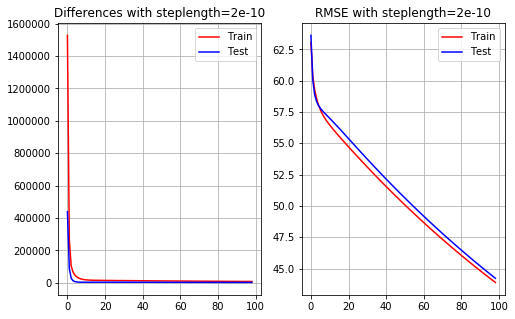

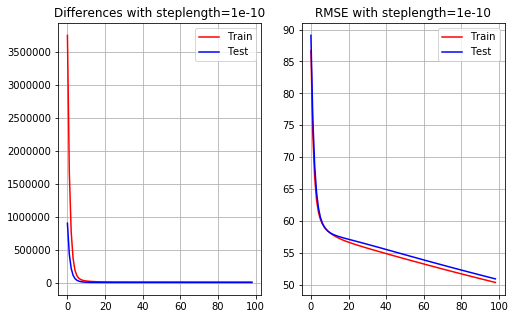

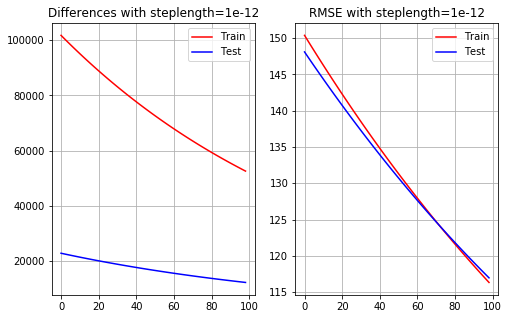

In [33]:
u=(0.0000000002, 0.0000000001,0.000000000001)
max_iter = 100
plot_training(X_train1, y_train1, X_test1, y_test1,u, max_iter, learn_linregGD)

As we can see, we used a very low step length for training, otherwise it would not converge. This happens because of the size of the training set and the range of the fatures. If we normalize features and divide the loss by the number of samples, we may choose greater values for step length.

After looking at the plots, notice also that the greater the spelength is, the faster is the convergence. Now we train the regression model using the dataset2. We present the table to compare the RMSE and the difference of losses at itaretion 40.


<table style="width:100%">
  <tr>
    <th>Step-length</th>
    <th>Differences at iteration 40 (train)</th> 
    <th>RMSE at iteration 40 (train)</th>
  </tr>
  <tr>
    <td>$\mu = 2e-7$</td>
    <td>50</td> 
    <td>1.12</td>
  </tr>
  <tr>
    <td>$\mu = 1e-7$</td>
    <td>99</td> 
    <td>1.72</td>
  </tr>
   <tr>
    <td>$\mu = 1e-9$</td>
    <td>249</td> 
    <td>4.51</td>
  </tr>
</table> 

Notice again, that the greater is the step length, the lower is the RMSE at iteration 4 (and the faster is the convergence).

Dif. train: 50.9417579308 with u= 2e-07
Dif. test: 14.491218681 with u= 2e-07
RMSE train: 1.12612439657 with u= 2e-07
RMSE test: 1.12821250557 with u= 2e-07
Dif. train: 99.6051607282 with u= 1e-07
Dif. test: 28.7644672062 with u= 1e-07
RMSE train: 1.72092193088 with u= 1e-07
RMSE test: 1.78262080987 with u= 1e-07
Dif. train: 249.726031906 with u= 1e-09
Dif. test: 61.352385756 with u= 1e-09
RMSE train: 4.51043263853 with u= 1e-09
RMSE test: 4.62882761646 with u= 1e-09


0

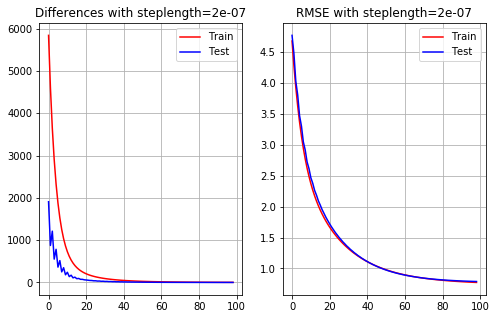

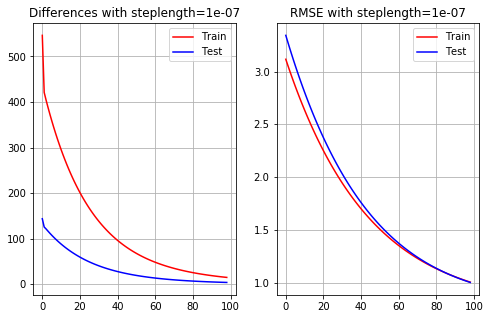

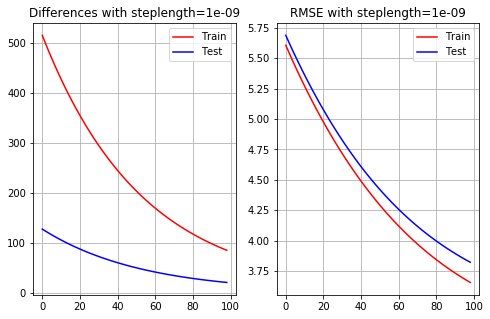

In [34]:
u=(0.0000002, 0.0000001,0.000000001)
max_iter = 100
plot_training(X_train2, y_train2, X_test2, y_test2,u, max_iter, learn_linregGD)


We now train a regression model and put the results on a table (the same way we did for the others ones).

<table style="width:100%">
  <tr>
    <th>Step-length</th>
    <th>Differences at iteration 40 (train)</th> 
    <th>RMSE at iteration 40 (train)</th>
  </tr>
  <tr>
    <td>$\mu = 2e-9$</td>
    <td>7.67</td> 
    <td>2.009</td>
  </tr>
  <tr>
    <td>$\mu = 1e-9$</td>
    <td>3.89</td> 
    <td>2.019</td>
  </tr>
   <tr>
    <td>$\mu = 1e-11$</td>
    <td>371</td> 
    <td>5.58</td>
  </tr>
</table> 

Dif. train: 7.6789161072 with u= 2e-09
Dif. test: 2.10299200924 with u= 2e-09
RMSE train: 2.00932466884 with u= 2e-09
RMSE test: 2.09829657261 with u= 2e-09
Dif. train: 3.89700480551 with u= 1e-09
Dif. test: 0.927127792556 with u= 1e-09
RMSE train: 2.01936150441 with u= 1e-09
RMSE test: 2.10865617463 with u= 1e-09
Dif. train: 371.806353294 with u= 1e-11
Dif. test: 94.1484785655 with u= 1e-11
RMSE train: 5.58305981935 with u= 1e-11
RMSE test: 5.5721610298 with u= 1e-11


0

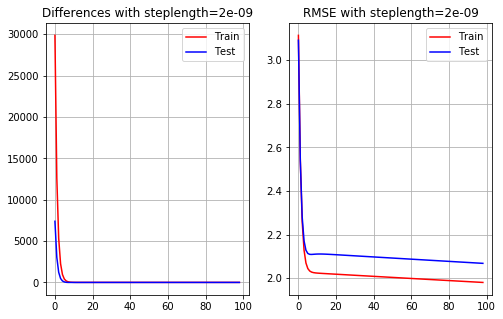

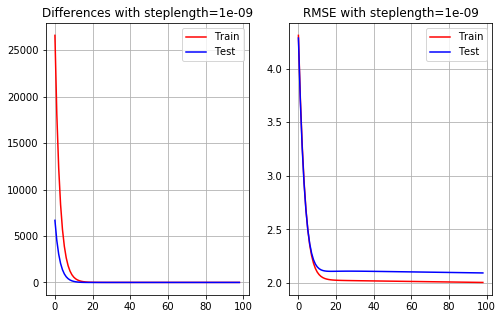

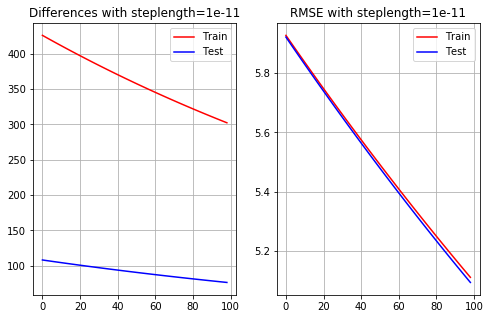

In [31]:
u=(0.000000002, 0.000000001,0.00000000001)
max_iter = 100
plot_training(X_train3, y_train3, X_test3, y_test3,u, max_iter, learn_linregGD)


In [36]:
def armijo_condition (X, beta, y, delta):
    
    """This function evaluates the Armijo condition using x and delta as input parameters"""
    
    #define initial alpha and other important parameters
    alpha=1
    f = linear_loss(X, beta, y)
    grad = grad_linear_function(X, beta, y.T)
    ref = delta*grad.T*grad
    #iterates until the Armijo condition holds
    while (f-linear_loss(X=X, beta =(beta-alpha*grad),y=y))<(alpha*ref):
        alpha = alpha/2
    
    return alpha

Plotting for dataset1
Number of iter: 5
Dif train at last iteration: 0.0
RMSE in train at last iteration: 56.8113068498
Plotting for dataset2
Number of iter: 28
Dif train at last iteration: 0.0
RMSE in train at last iteration: 0.846806580805
Plotting for dataset3
At iter 40
Dif train at last iteration: 32.3896886985
RMSE in train at last iteration: 1.88116160242


0

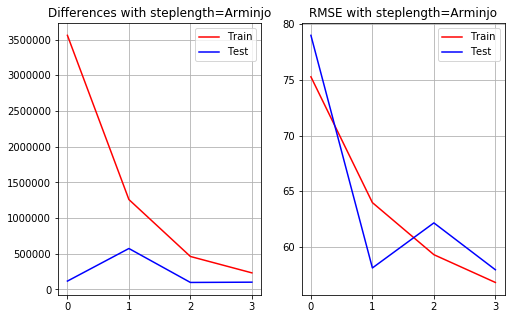

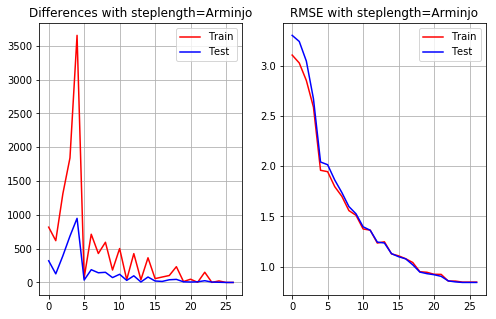

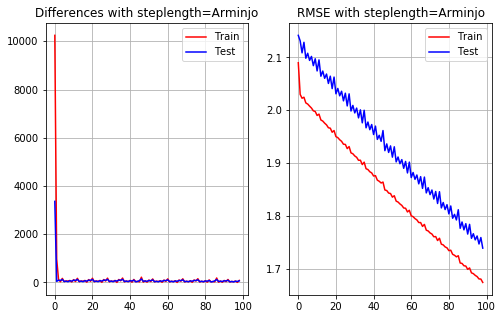

In [55]:
def learn_linregGD_with_Arm(X_train, y_train, X_test, y_test, u, max_iter):
    
    """This functions finds the best parameters for a linear regression
    using X_train and y_train to estimate these parameters.
    This function also use Armijo-Condition to speed up convergence.
    It also evaluates RMSE and difference of losses fo X_train and X_test.
    The argument 'max_iter' determines the maximum number of iterations.
    The arugment 'u' determines a tuple of step legth values to try.
    
    Returns: 
    - beta: the optimized parameter
    - dif_train_list: a list with the difference of losses for train data
    - dif_test_list: a list with the difference of losses for test data
    - rmse_train_list: a list with the RMSE for train data
    - rmse_test_list: a list with the RMSE for test data """
    
    #transforming to matrix data type
    X_train = np.matrix(X_train)
    X_test = np.matrix(X_test)
    y_train = np.matrix(y_train).T
    y_test = np.matrix(y_test).T

    #getting the number of samples for each data set
    n_samples_train = X_train.shape[0]
    n_samples_test = X_test.shape[0]
    
    #initializing parameter to optimize
    beta = np.matrix(np.zeros((X_train.shape[1],1)))

    #initializing other parameters
    prev_loss_train = 0
    prev_loss_test = 0
    dif_train_list = []
    rmse_train_list = []
    dif_test_list = []
    rmse_test_list = []
    delta = 0.1
    
    for i in range(max_iter):
 
        #finding alpha with armijo
        u = armijo_condition(X_train, beta, y_train.T, delta)
        
        #upgrading beta
        beta = beta - u*grad_linear_function(X_train, beta, y_train)
        
        #loss train
        loss_train = linear_loss(X_train, beta, y_train)
        
        #loss test
        loss_test = linear_loss(X_test, beta, y_test)
        
        #dif train
        dif_train = np.abs(loss_train-prev_loss_train)
        
        #dif test
        dif_test = np.abs(loss_test-prev_loss_test)
        
        #prev loss train
        prev_loss_train = loss_train
        
        #prev loss test
        prev_loss_test = loss_test
        
        #rmse train
        rmse_train = np.sqrt(loss_train/n_samples_train)

        #rmse test
        rmse_test = np.sqrt(loss_test/n_samples_test)

  
        if(i == 40):
            print("At iter 40")
            print("Dif train at last iteration:", dif_train)
            print("RMSE in train at last iteration:", rmse_train)            

        #then if the difference is too low
        if(dif_train<1e-20):
            print("Number of iter:", i)
            print("Dif train at last iteration:", dif_train)
            print("RMSE in train at last iteration:", rmse_train)
            break
        
        dif_train_list.append(dif_train)
        rmse_train_list.append(rmse_train)
        dif_test_list.append(dif_test)
        rmse_test_list.append(rmse_test)
        
    return beta, dif_train_list, dif_test_list, rmse_train_list, rmse_test_list

u=["Arminjo"]
#plot difference of losses and RMSE for each dataset
print("Plotting for dataset1")
plot_training(X_train1, y_train1, X_test1, y_test1,u, 100, learn_linregGD_with_Arm)       

print("Plotting for dataset2")
plot_training(X_train2, y_train2, X_test2, y_test2,u, 100, learn_linregGD_with_Arm)       

print("Plotting for dataset3")
plot_training(X_train3, y_train3, X_test3, y_test3,u, 100, learn_linregGD_with_Arm)       


We can compare now the different RMSE achieved during the iterations using and without using Arminjo.

Now we tabulate the information about the results in iteration 40.


<table style="width:100%">
  <tr>
    <th>Dataset</th>
    <th>RMSE at iteration 40 with high step-size (train)</th> 
    <th>RMSE at iteration 40 using Arminjo (train)</th>
  </tr>
  <tr>
    <td>Dataset 1</td>
    <td>50.94</td> 
    <td>56.81</td>
  </tr>
  <tr>
    <td>Dataset 2</td>
    <td>1.12</td> 
    <td>0.84</td>
  </tr>
   <tr>
    <td>Dataset 3</td>
    <td>2.01</td> 
    <td>1.88</td>
  </tr>
</table> 

As we can see using Arminjo we achieved lower RMSE in fewer steps, it means, that it converges faster!

Dif. train: 2.12722079037 with u= 3.4935137931177597e-15
Dif. test: 0.68350982829 with u= 3.4935137931177597e-15
RMSE train: 59.8129882249 with u= 3.4935137931177597e-15
RMSE test: 60.1683806712 with u= 3.4935137931177597e-15
Dif. train: 1595.96554578 with u= 1.7637258815629013e-08
Dif. test: 386.98023839 with u= 1.7637258815629013e-08
RMSE train: 3.57232778873 with u= 1.7637258815629013e-08
RMSE test: 3.74503529901 with u= 1.7637258815629013e-08
Dif. train: 67.4590318456 with u= 1.7637258815629013e-08
Dif. test: 18.4654229634 with u= 1.7637258815629013e-08
RMSE train: 2.00352965581 with u= 1.7637258815629013e-08
RMSE test: 2.09222322292 with u= 1.7637258815629013e-08


0

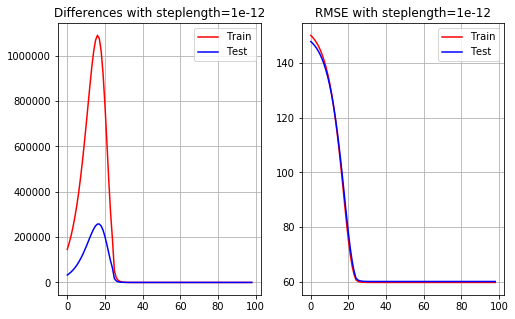

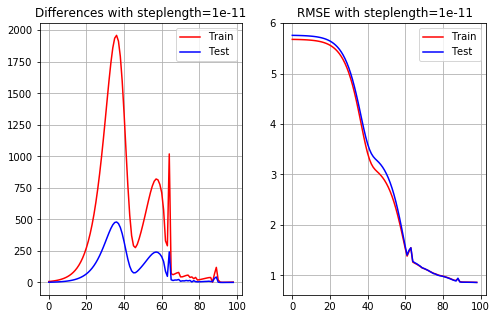

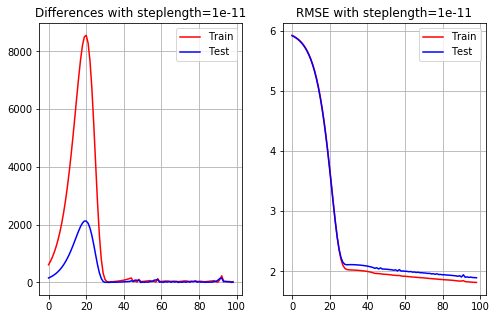

In [54]:
def bold_driver(X, beta, y, a_1, a_2, alpha):
    
    '''Ths functions uses bold driver strategie to speed up gradient descent.'''
    
    f = linear_loss(X, beta, y)
    grad = grad_linear_function(X, beta, y.T)
    

    if((f-linear_loss(X=X, beta= (beta-alpha*grad), y=y))<=0): #if the loss increases after the update
        alpha = alpha*a_2 #reduce step size
    else:
        alpha = alpha*a_1 #increase step size
        #print(alpha)
    return alpha

def learn_linregGD_with_BoldD(X_train, y_train, X_test, y_test, u, max_iter):
 
    """This functions finds the best parameters for a linear regression
    using X_train and y_train to estimate these parameters.
    This function also use bold driver strategie to speed up convergence.
    It also evaluates RMSE and difference of losses fo X_train and X_test.
    The argument 'max_iter' determines the maximum number of iterations.
    The arugment 'u' determines a tuple of step legth values to try.
    
    Returns: 
    - beta: the optimized parameter
    - dif_train_list: a list with the difference of losses for train data
    - dif_test_list: a list with the difference of losses for test data
    - rmse_train_list: a list with the RMSE for train data
    - rmse_test_list: a list with the RMSE for test data """
 
    #transforming to matrix data type
    X_train = np.matrix(X_train)
    X_test = np.matrix(X_test)
    y_train = np.matrix(y_train).T
    y_test = np.matrix(y_test).T

    #getting the number of samples for each data set
    n_samples_train = X_train.shape[0]
    n_samples_test = X_test.shape[0]
    
    #initializing parameter to optimize
    beta = np.matrix(np.zeros((X_train.shape[1],1)))

    #initializing other parameters
    prev_loss_train = 0
    prev_loss_test = 0
    dif_train_list = []
    rmse_train_list = []
    dif_test_list = []
    rmse_test_list = []
    
    delta = 0.1
    
    for i in range(max_iter):
 

        #finding alpha with armijo
        u = bold_driver(X_train, beta, y_train.T, 1.2, 0.5, u)
        
        #upgrading beta
        beta = beta - u*grad_linear_function(X_train, beta, y_train)
        
        #loss train
        loss_train = linear_loss(X_train, beta, y_train)
        
        #loss test
        loss_test = linear_loss(X_test, beta, y_test)
        
        #dif train
        dif_train = np.abs(loss_train-prev_loss_train)
        
        #dif test
        dif_test = np.abs(loss_test-prev_loss_test)
        
        #prev loss train
        prev_loss_train = loss_train
        
        #prev loss test
        prev_loss_test = loss_test
        
        #rmse train
        rmse_train = np.sqrt(loss_train/n_samples_train)
        
        #rmse test
        rmse_test = np.sqrt(loss_test/n_samples_test)
    
        #we print error at iteration 40 to compare
        if(i==40):
            print("Dif. train:",dif_train, "with u=", u)
            print("Dif. test:", dif_test, "with u=", u)
            print("RMSE train:", rmse_train,"with u=", u)
            print("RMSE test:", rmse_test, "with u=", u)
            
        dif_train_list.append(dif_train)
        rmse_train_list.append(rmse_train)
        dif_test_list.append(dif_test)
        rmse_test_list.append(rmse_test)
        
    return beta, dif_train_list, dif_test_list, rmse_train_list, rmse_test_list

u=[0.000000000001]
plot_training(X_train1, y_train1, X_test1, y_test1,u, 100, learn_linregGD_with_BoldD)       
u=[0.00000000001]
plot_training(X_train2, y_train2, X_test2, y_test2,u, 100, learn_linregGD_with_BoldD)       
u=[0.00000000001]
plot_training(X_train3, y_train3, X_test3, y_test3,u, 100, learn_linregGD_with_BoldD)       


    

Now we tabulate the information about the results in iteration 40.


<table style="width:100%">
  <tr>
    <th>Dataset</th>
    <th>Differences at iteration 40 (train)</th> 
    <th>RMSE at iteration 40 (train)</th>
  </tr>
  <tr>
    <td>Dataset 1</td>
    <td>2.12</td> 
    <td>59.81</td>
  </tr>
  <tr>
    <td>Dataset 2</td>
    <td>1595.96</td> 
    <td>3.57</td>
  </tr>
   <tr>
    <td>Dataset 3</td>
    <td>67.45</td> 
    <td>2.00</td>
  </tr>
</table> 

We notice again, that the bold driver is a good strategie to speed up convergence. However sometimes it could create some peaks and increase the error during the iterations. It also makes that the step length varies a lot, as we can see in the graphs of the loss difference between two consecutive iterations.

### Conclusions

* We notice that the greater is the sept length, the faster is the convergecens. This holds for all the datasets.
* If we implement strategies as armijo condition or bold driver the convergece seepd get increased.
* For all datasets and the different strategies used, we see that the train RMSE and test RMSE remains close one to each other. This shows that the linear regression is generalizing well. Also, we see that the test RMSE remains almost always bigger than the train RMSE.
* With the strategies like "bold driver" and "armijo", we see that the behaviour of difference of losses is less soft, since at every iteration, the step length changes (it may increase or decrease).
* We use a very low values for step length, to guarantee a convergence of the algorithm. This ocurrs beacuse of the size in the training set and the range of some variables. Maybe, if we divide the loss between the number of samples and scale the features, the steplngth can be increased to guarantee convergence.

### References

* A variant of Bold Driver implementation was taken from this page: https://media.ed.ac.uk/media/%E2%80%9CBold+Driver%E2%80%9D+Gradient+Descent/1_813trhda